In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary
import statsmodels.api as sm
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_excel(r"C:\Users\jesse\OneDrive\Desktop\D600 Task 3 Dataset 1 Housing Information.xlsx")

In [3]:
display(df)

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6987,307821.1758,550.00,2.111022,4,892.35,11.89,7.97,28.18,19.23,...,4.76,3.81,6.87,No,White,Yes,1,18,241131.63070,1
6996,6995,421368.8869,1726.12,4.056115,2,943.19,34.06,5.82,90.45,17.60,...,5.31,9.84,10.00,No,White,Yes,1,18,481604.80730,1
6997,6996,473382.5348,1026.36,2.077177,5,149.31,0.10,8.81,31.79,11.59,...,4.98,7.47,2.96,No,Green,No,1,13,380555.49390,1
6998,6998,343397.9756,2218.22,1.000000,4,526.81,11.18,9.20,15.21,3.96,...,4.68,7.66,6.12,No,Blue,Yes,1,10,442610.31710,0


In [4]:
y = df["Price"]

In [5]:
print(max(y))

1046675.64


In [6]:
df = df.drop(["ID", "Price", "NumBathrooms", "NumBedrooms", "Fireplace", "HouseColor", "Garage", "Floors", "Windows", "IsLuxury"], axis=1)

In [7]:
display(df)

,SquareFootage,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQuality,LocalAmenities,TransportAccess,PreviousSalePrice
0,566.62,779.42,20.56,5.62,39.46,10.08,97.29,1.84,4.93,4.44,4.55,181861.54230
1,1472.34,656.13,15.62,5.63,40.51,7.89,93.22,0.95,4.08,5.56,6.83,50042.59757
2,550.00,754.57,12.47,9.20,48.38,23.74,96.60,1.87,4.26,8.07,8.48,48400.34440
3,941.81,439.59,22.22,7.08,94.67,5.22,91.45,1.45,4.45,5.00,6.27,84594.12145
4,550.00,353.03,8.28,5.93,16.80,43.13,86.50,1.26,3.36,5.46,6.99,22934.59654
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,550.00,892.35,11.89,7.97,28.18,19.23,96.91,1.39,4.76,3.81,6.87,241131.63070
6996,1726.12,943.19,34.06,5.82,90.45,17.60,92.25,1.67,5.31,9.84,10.00,481604.80730
6997,1026.36,149.31,0.10,8.81,31.79,11.59,94.57,1.45,4.98,7.47,2.96,380555.49390
6998,2218.22,526.81,11.18,9.20,15.21,3.96,99.90,1.52,4.68,7.66,6.12,442610.31710


In [8]:
print(y.describe())

count    7.000000e+03
mean     3.072820e+05
std      1.501734e+05
min      8.500000e+04
25%      1.921075e+05
50%      2.793230e+05
75%      3.918781e+05
max      1.046676e+06
Name: Price, dtype: float64


In [9]:
print(df["SquareFootage"].describe())

count    7000.000000
mean     1048.947459
std       426.010482
min       550.000000
25%       660.815000
50%       996.320000
75%      1342.292500
max      2874.700000
Name: SquareFootage, dtype: float64


In [10]:
print(df["BackyardSpace"].describe())

count    7000.000000
mean      511.507029
std       279.926549
min         0.390000
25%       300.995000
50%       495.965000
75%       704.012500
max      1631.360000
Name: BackyardSpace, dtype: float64


In [11]:
print(df["CrimeRate"].describe())

count    7000.000000
mean       31.226194
std        18.025327
min         0.030000
25%        17.390000
50%        30.385000
75%        43.670000
max        99.730000
Name: CrimeRate, dtype: float64


In [12]:
print(df["SchoolRating"].describe())

count    7000.000000
mean        6.942923
std         1.888148
min         0.220000
25%         5.650000
50%         7.010000
75%         8.360000
max        10.000000
Name: SchoolRating, dtype: float64


In [13]:
print(df["AgeOfHome"].describe())

count    7000.000000
mean       46.797046
std        31.779701
min         0.010000
25%        20.755000
50%        42.620000
75%        67.232500
max       178.680000
Name: AgeOfHome, dtype: float64


In [14]:
print(df["DistanceToCityCenter"].describe())

count    7000.000000
mean       17.475337
std        12.024985
min         0.000000
25%         7.827500
50%        15.625000
75%        25.222500
max        65.200000
Name: DistanceToCityCenter, dtype: float64


In [15]:
print(df["EmploymentRate"].describe())

count    7000.000000
mean       93.711349
std         4.505359
min        72.050000
25%        90.620000
50%        94.010000
75%        97.410000
max        99.900000
Name: EmploymentRate, dtype: float64


In [17]:
print(df["PropertyTaxRate"].describe())

count    7000.000000
mean        1.500437
std         0.498591
min         0.010000
25%         1.160000
50%         1.490000
75%         1.840000
max         3.360000
Name: PropertyTaxRate, dtype: float64


In [18]:
print(df["RenovationQuality"].describe())

count    7000.000000
mean        5.003357
std         1.970428
min         0.010000
25%         3.660000
50%         5.020000
75%         6.350000
max        10.000000
Name: RenovationQuality, dtype: float64


In [19]:
print(df["LocalAmenities"].describe())

count    7000.000000
mean        5.934579
std         2.657930
min         0.000000
25%         4.000000
50%         6.040000
75%         8.050000
max        10.000000
Name: LocalAmenities, dtype: float64


In [20]:
print(df["TransportAccess"].describe())

count    7000.000000
mean        5.983860
std         1.953974
min         0.010000
25%         4.680000
50%         6.000000
75%         7.350000
max        10.000000
Name: TransportAccess, dtype: float64


In [21]:
print(df["PreviousSalePrice"].describe())

count    7.000000e+03
mean     2.845094e+05
std      1.857340e+05
min     -8.356902e+03
25%      1.420140e+05
50%      2.621831e+05
75%      3.961212e+05
max      1.296607e+06
Name: PreviousSalePrice, dtype: float64


In [41]:
scaler = StandardScaler()
df_new = scaler.fit_transform(df)

In [119]:
df_new1 = pd.DataFrame(df_new, columns=df.columns)

df_new1.to_csv(r"C:\Users\jesse\OneDrive\Desktop\Standardized Dataset")

In [45]:
cov_matrix = np.cov(df_new.T)

In [47]:
print(cov_matrix)

[[ 1.00014288  0.08824851 -0.04414921  0.28571952 -0.07910867 -0.16216743
   0.0441724  -0.09838408  0.38739981  0.10001461  0.09588964  0.58389628]
 [ 0.08824851  1.00014288 -0.04607436  0.04732675 -0.03980082 -0.04482697
   0.05016759 -0.04654615  0.09436378  0.04686342  0.05097423  0.08217702]
 [-0.04414921 -0.04607436  1.00014288 -0.18994257  0.04802311  0.08345535
  -0.09782334  0.05036685 -0.09355982 -0.04724031 -0.04877584 -0.07606851]
 [ 0.28571952  0.04732675 -0.18994257  1.00014288 -0.12324104 -0.1729871
   0.19843441 -0.14588582  0.49532526  0.13864178  0.14553125  0.42121357]
 [-0.07910867 -0.03980082  0.04802311 -0.12324104  1.00014288  0.14177125
  -0.04235269  0.08701077 -0.11889285 -0.08121907 -0.08336461 -0.13845255]
 [-0.16216743 -0.04482697  0.08345535 -0.1729871   0.14177125  1.00014288
  -0.02962072  0.09545426 -0.17358806 -0.08014216 -0.08016528 -0.21313238]
 [ 0.0441724   0.05016759 -0.09782334  0.19843441 -0.04235269 -0.02962072
   1.00014288 -0.0510014   0.1964

In [49]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [51]:
print(eigen_values)

[2.82319341 1.32601259 0.37259989 0.47274845 0.51202145 0.67872311
 1.10998112 1.05035864 0.83235933 0.98277856 0.92900114 0.91193684]


In [53]:
#define PCA model to use
pca_first = PCA(n_components=12)

#fit PCA model to data
pca_fit = pca_first.fit(df_new)

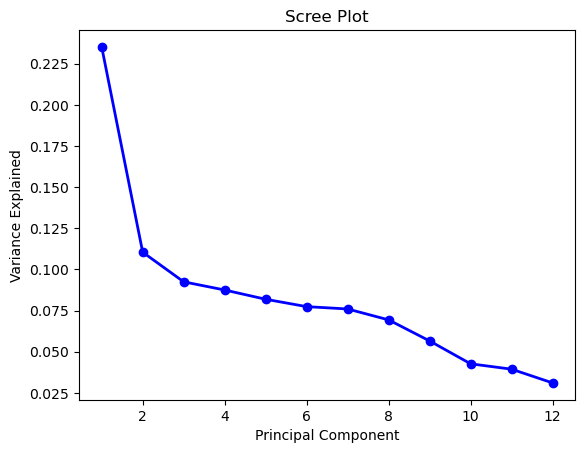

In [55]:
PC_values = np.arange(pca_first.n_components_) + 1
plt.plot(PC_values, pca_first.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [57]:
#define PCA model to use
pca = PCA(n_components=3)

#fit PCA model to data
pca_fit = pca.fit(df_new)

In [121]:
loadings = pd.DataFrame(pca.components_.T, columns = ["PC1", "PC2", "PC3"], index=df_new1.columns.values)
print(loadings)

                           PC1       PC2       PC3
SquareFootage         0.381054  0.239347  0.375757
BackyardSpace         0.107063 -0.004035 -0.124916
CrimeRate            -0.136758 -0.037752  0.601606
SchoolRating          0.405542  0.144123 -0.183093
AgeOfHome            -0.164976  0.037457  0.129157
DistanceToCityCenter -0.223300 -0.069706  0.015187
EmploymentRate        0.156930  0.058454 -0.584208
PropertyTaxRate      -0.167303 -0.094551  0.101661
RenovationQuality     0.446784  0.099069  0.030533
LocalAmenities        0.240516 -0.655931  0.044572
TransportAccess       0.242320 -0.655194  0.037412
PreviousSalePrice     0.462912  0.180393  0.273651


In [59]:
var_exp = pca.explained_variance_ratio_

In [61]:
print(var_exp)

[0.23523251 0.11048526 0.09248521]


In [63]:
print(pca)

PCA(n_components=3)


In [65]:
df_regression=pca.fit_transform(df_new)

In [67]:
df_regression=pd.DataFrame(df_regression)

In [69]:
print(df_regression)

             0         1         2
0    -0.931645  0.409043 -1.411649
1    -0.074048 -0.151021 -0.520698
2    -0.128419 -1.770111 -1.954223
3    -0.781219 -0.009438 -0.227587
4    -1.984420 -1.096347 -0.640030
...        ...       ...       ...
6995  0.033555  0.036220 -1.952206
6996  1.583736 -1.821542  1.447390
6997  0.710538  0.964574 -1.159331
6998  2.806493  0.654572 -0.547916
6999  2.835588  1.042241 -0.457317

[7000 rows x 3 columns]


In [71]:
print(y)

0       255614.8992
1       155586.0947
2       131050.8324
3       151361.7125
4       113167.6128
           ...     
6995    307821.1758
6996    421368.8869
6997    473382.5348
6998    343397.9756
6999    438060.8193
Name: Price, Length: 7000, dtype: float64


In [73]:
linearreg = LinearRegression()
forwad = SequentialFeatureSelector(
linearreg,
k_features=3,
forward=True,
verbose=1
)
sf = forwad.fit(df_regression, y)

Features: 3/3

In [75]:
feat_names = list(sf.k_feature_names_)
print(feat_names)

print(sf.k_feature_idx_)

[0, 1, 2]
(0, 1, 2)


In [89]:
df_regression = sm.add_constant(df_regression)

In [91]:
first_model = sm.OLS(y, df_regression).fit()

df_regression.columns = df_regression.columns.astype(str)

In [93]:
print(first_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     3096.
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        13:03:28   Log-Likelihood:                -90412.
No. Observations:                7000   AIC:                         1.808e+05
Df Residuals:                    6996   BIC:                         1.809e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.073e+05   1176.774    261.122      0.0

In [95]:
train_x, valid_x, train_y, valid_y = train_test_split(df_regression, y, test_size=0.4, random_state=1)

In [97]:


house_lm = LinearRegression()
house_lm.fit(train_x, train_y)

print(pd.DataFrame({'Predictor': df_regression.columns, 'coefficient': house_lm.coef_}))

  Predictor   coefficient
0     const      0.000000
1         0  62935.274914
2         1  23925.358927
3         2  34854.678353


In [103]:
regressionSummary(train_y, house_lm.predict(train_x))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 99007.5869
            Mean Absolute Error (MAE) : 77811.2186
          Mean Percentage Error (MPE) : -9.8689
Mean Absolute Percentage Error (MAPE) : 28.8439


In [105]:
print(99007.5869**2)

9802502263.761051


In [107]:
# Use predict() to make predictions on a new set
new_house_lm_pred = house_lm.predict(valid_x)

result = pd.DataFrame({'Predicted': new_house_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - new_house_lm_pred})
print(result.head(20))

# print performance measures (validation data)
regressionSummary(valid_y, new_house_lm_pred)

          Predicted       Actual       Residual
2305  180614.023124  184107.5474    3493.524276
4388  389692.921086  376148.7559  -13544.165186
1686  216371.941435  188820.5790  -27551.362435
4945  312485.482342  298752.8523  -13732.630042
4197  454325.714964  464444.5259   10118.810936
1651  316008.226602  228390.5602  -87617.666402
1528  218273.518304  264959.3866   46685.868296
6346  495011.722989  614439.2730  119427.550011
6189  367158.389144  356183.7097  -10974.679444
5389  278146.473707  354213.0866   76066.612893
2575  218079.016575  141189.5276  -76889.488975
4474  341946.826376  369719.7828   27772.956424
2403  280329.804736  191694.2262  -88635.578536
1070  194303.635742  196530.6017    2226.965958
3216  204986.904152  183793.3108  -21193.593352
5856  280623.848343  330861.4805   50237.632157
3534  357865.061182  323339.5808  -34525.480382
1989  292010.862580  201087.8037  -90923.058880
4873  371142.908910  450706.0897   79563.180790
1555  277517.417772  189580.6762  -87936

In [111]:
print(97601.1188**2)

9525978391.011713


In [131]:
train_y = pd.DataFrame(train_y)

train_x = pd.DataFrame(train_x)

train_merged = train_y.merge(train_x, left_index=True, right_index=True)

In [133]:
valid_y = pd.DataFrame(valid_y)

valid_x = pd.DataFrame(valid_x)

valid_merged = valid_y.merge(valid_x ,left_index=True, right_index=True)